# Image IPP coding

In [22]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --

## Without I-type blocks

In [9]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [10]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP
#import MP4 as IPP


In [11]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4415982744107744 KBPS: 4029.072 Average AMSE: 49.7563548900463
     2	Q_step: 24 BPP: 0.3277172769360269 KBPS: 2990.04 Average AMSE: 77.0008304617354
     3	Q_step: 27 BPP: 0.23674856200897867 KBPS: 2160.056 Average AMSE: 124.58244346678589
     4	Q_step: 30 BPP: 0.1661765221661055 KBPS: 1516.168 Average AMSE: 203.39484493371216
     5	Q_step: 33 BPP: 0.11386609147025814 KBPS: 1038.896 Average AMSE: 324.48683054503374
     6	Q_step: 36 BPP: 0.07825126262626263 KBPS: 713.952 Average AMSE: 483.44873967539985
     7	Q_step: 39 BPP: 0.056442901234567903 KBPS: 514.976 Average AMSE: 650.7225844600521


In [12]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [13]:
!cat /tmp/curve_no_intrablocks.txt

0.4415982744107744	49.7563548900463
0.3277172769360269	77.0008304617354
0.23674856200897867	124.58244346678589
0.1661765221661055	203.39484493371216
0.11386609147025814	324.48683054503374
0.07825126262626263	483.44873967539985
0.056442901234567903	650.7225844600521


In [14]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [1]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [2]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP
#import MP4 as IPP


In [3]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.43518606200897864 KBPS: 3970.568 Average AMSE: 44.62461978728254
     2	Q_step: 24 BPP: 0.3233129910213244 KBPS: 2949.8559999999998 Average AMSE: 69.61106288580248
     3	Q_step: 27 BPP: 0.2354508627946128 KBPS: 2148.2160000000003 Average AMSE: 109.67945218241444
     4	Q_step: 30 BPP: 0.1667631172839506 KBPS: 1521.52 Average AMSE: 171.7896471222643
     5	Q_step: 33 BPP: 0.11622387065095399 KBPS: 1060.408 Average AMSE: 259.0075332316218
     6	Q_step: 36 BPP: 0.08322022306397306 KBPS: 759.288 Average AMSE: 368.9245122667649
     7	Q_step: 39 BPP: 0.06239565796857463 KBPS: 569.288 Average AMSE: 511.1807956956721


In [4]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [5]:
!cat /tmp/curve_with_intrablocks.txt

0.43518606200897864	44.62461978728254
0.3233129910213244	69.61106288580248
0.2354508627946128	109.67945218241444
0.1667631172839506	171.7896471222643
0.11622387065095399	259.0075332316218
0.08322022306397306	368.9245122667649
0.06239565796857463	511.1807956956721


In [6]:
!cat /tmp/curve_with_intrablocks.txt

0.43518606200897864	44.62461978728254
0.3233129910213244	69.61106288580248
0.2354508627946128	109.67945218241444
0.1667631172839506	171.7896471222643
0.11622387065095399	259.0075332316218
0.08322022306397306	368.9245122667649
0.06239565796857463	511.1807956956721


In [7]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

## MP4

In [15]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as IPP\n/\nimport MP4 as IPP\n/g' RD_curve.py

In [16]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
#import image_IPP_adaptive as IPP
import MP4 as IPP


In [17]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enabl

frame=   30 fps=0.0 q=-1.0 Lsize=     120kB time=00:00:01.16 bitrate= 849.9kbits/s speed=5.17x    
video:119kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.788368%
[libx264 @ 0x564fe5edf040] frame I:1     Avg QP:28.98  size: 15399
[libx264 @ 0x564fe5edf040] frame P:29    Avg QP:29.19  size:  3664
[libx264 @ 0x564fe5edf040] mb I  I16..4:  1.3% 64.1% 34.6%
[libx264 @ 0x564fe5edf040] mb P  I16..4:  0.2%  0.4%  0.5%  P16..4: 39.0% 30.4% 19.6%  0.0%  0.0%    skip:10.0%
[libx264 @ 0x564fe5edf040] 8x8 transform intra:57.8% inter:52.7%
[libx264 @ 0x564fe5edf040] coded y,u,v intra: 90.7% 40.1% 27.2% inter: 39.6% 4.4% 2.7%
[libx264 @ 0x564fe5edf040] i16 v,h,dc,p: 17% 78%  0%  4%
[libx264 @ 0x564fe5edf040] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 21% 19% 20%  4%  6%  6%  6%  7% 11%
[libx264 @ 0x564fe5edf040] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 29% 32% 11%  4%  5%  5%  5%  5%  5%
[libx264 @ 0x564fe5edf040] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x564fe5edf040] ref P L0: 66

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/tmp/output.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
  Duration: 00:00:01.20, start: 0.000000, bitrate: 542 kb/s
    Stream #0:0(und): Video: h264 (High 4:4:4 Predictive) (avc1 / 0x31637661), yuv444p, 352x288 [SAR 128:117 DAR 1408:1053], 535 kb/s, 25 fps, 25 tbr, 12800 tbn, 50 tbc (default)
    Metadata:
      handler_name    : VideoHandler
Stream mapping:
  Stream #0:0 -> #0:0 (h264 (native) -> png (native))
Press [q] to stop, [?] for help
Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : L

frame=   30 fps=0.0 q=-1.0 Lsize=      36kB time=00:00:01.16 bitrate= 252.0kbits/s speed=7.25x    
video:35kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.709692%
[libx264 @ 0x55d7cf8d3040] frame I:1     Avg QP:37.97  size:  5493
[libx264 @ 0x55d7cf8d3040] frame P:29    Avg QP:38.40  size:  1016
[libx264 @ 0x55d7cf8d3040] mb I  I16..4: 10.1% 63.9% 26.0%
[libx264 @ 0x55d7cf8d3040] mb P  I16..4:  0.3%  0.6%  0.3%  P16..4: 40.5% 11.3%  5.7%  0.0%  0.0%    skip:41.3%
[libx264 @ 0x55d7cf8d3040] 8x8 transform intra:59.2% inter:71.7%
[libx264 @ 0x55d7cf8d3040] coded y,u,v intra: 67.1% 17.7% 15.0% inter: 11.7% 1.5% 1.1%
[libx264 @ 0x55d7cf8d3040] i16 v,h,dc,p: 24% 49% 14% 14%
[libx264 @ 0x55d7cf8d3040] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 22% 20% 26%  5%  5%  5%  5%  4%  7%
[libx264 @ 0x55d7cf8d3040] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 36% 21% 21%  3%  4%  4%  5%  3%  4%
[libx264 @ 0x55d7cf8d3040] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55d7cf8d3040] ref P L0: 74.

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.13x    
video:5544kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

In [18]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_MP4.txt

In [19]:
!cat /tmp/curve_MP4.txt

0.1676373106060606	30.738501551978118
0.10806151795735129	47.725119028829944
0.07132873877665544	73.63353763327721
0.04731867283950617	113.35061147499297
0.032039141414141416	175.44779128086418
0.02240547839506173	259.651842645202
0.01577493686868687	380.47030066287886


In [20]:
RD_points_MP4 = []
with open("/tmp/curve_MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_MP4.append((float(rate), float(_distortion)))

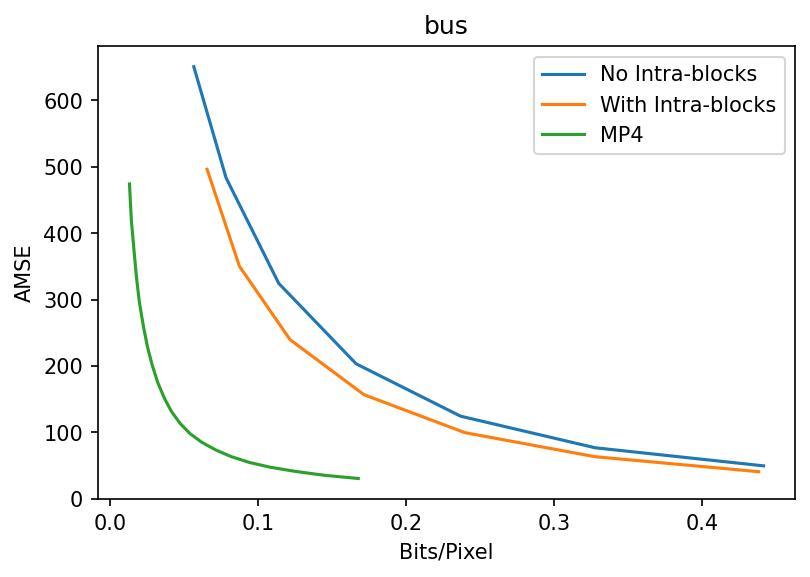

In [68]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

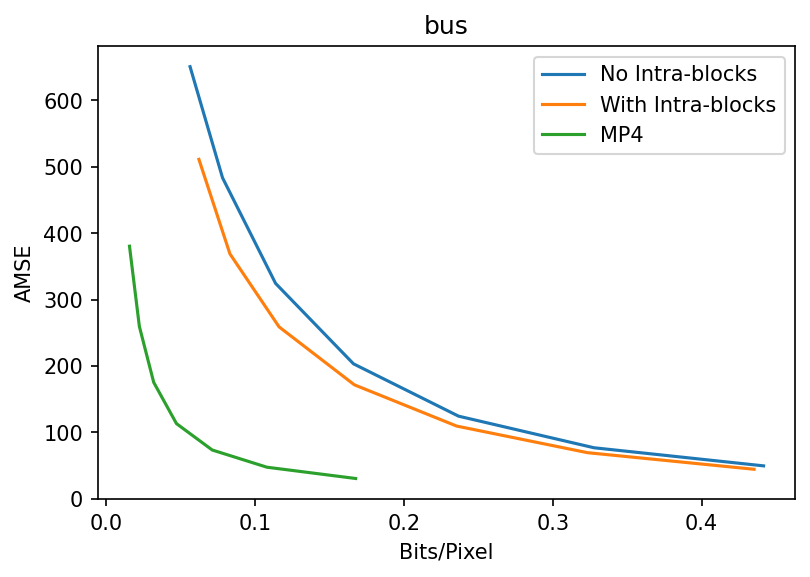

In [23]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()